<a href="https://colab.research.google.com/github/vien2/Data_Actividad1_Estadistica_avanzada/blob/main/Actividad1_EstadisticaAvanzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
data <- read.csv("/content/OnlineRetail.csv")

In [71]:
str(data)  #Mostramos la estrucutra de los datos
head(data)  #Mostramos los primeros registros cargados

'data.frame':	300000 obs. of  8 variables:
 $ InvoiceNo  : int  290889 762220 395967 744580 500194 166209 21688 951321 685422 637115 ...
 $ StockCode  : int  89032 61452 8170 18936 99083 52136 40075 41876 70634 86664 ...
 $ Description: chr  "Fundamental zero tolerance algorithm" "Profound bottom-line portal" "Compatible value-added database" "Future-proofed executive portal" ...
 $ Quantity   : int  2 10 4 3 10 3 4 2 8 7 ...
 $ InvoiceDate: chr  "2021-11-19 02:36:57" "2020-04-09 02:09:50" "2022-03-30 19:36:49" "2023-04-26 08:28:56" ...
 $ UnitPrice  : num  8.48 28.48 68.73 80.39 12.7 ...
 $ CustomerID : int  99590 33955 45118 72728 31985 97883 92297 27940 40201 31631 ...
 $ Country    : chr  "Guinea-Bissau" "Netherlands Antilles" "Japan" "Cape Verde" ...


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,290889,89032,Fundamental zero tolerance algorithm,2,2021-11-19 02:36:57,8.48,99590,Guinea-Bissau
2,762220,61452,Profound bottom-line portal,10,2020-04-09 02:09:50,28.48,33955,Netherlands Antilles
3,395967,8170,Compatible value-added database,4,2022-03-30 19:36:49,68.73,45118,Japan
4,744580,18936,Future-proofed executive portal,3,2023-04-26 08:28:56,80.39,72728,Cape Verde
5,500194,99083,Upgradable motivating access,10,2023-03-02 03:48:04,12.70,31985,Brazil
6,166209,52136,Expanded static moderator,3,2021-06-05 05:30:29,44.85,97883,Christmas Island


In [73]:
#Verificamos si existen valores nulos
any(is.na(data))

#Contamos los valores nulos en cada columna
colSums(is.na(data))

#Mostramos las filas con valores nulos
data[is.na(data$nombre_de_la_columna), ]

[1] FALSE

InvoiceNo   StockCode Description    Quantity InvoiceDate   UnitPrice 
          0           0           0           0           0           0 
 CustomerID     Country 
          0           0

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<int>,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>


Ejemplo de Análisis de Correlación

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.92 loaded



Regresión Lineal Simple: Quantity vs. TotalPurchasePrice

In [74]:
#Transformamos las variables a tipo número
data$Quantity <- as.numeric(data$Quantity)
data$UnitPrice <- as.numeric(data$UnitPrice)
#Creamos la variable
data$TotalPurchasePrice <- data$Quantity * data$UnitPrice

In [75]:
head(data)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchasePrice
,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,290889,89032,Fundamental zero tolerance algorithm,2,2021-11-19 02:36:57,8.48,99590,Guinea-Bissau,16.96
2,762220,61452,Profound bottom-line portal,10,2020-04-09 02:09:50,28.48,33955,Netherlands Antilles,284.80
3,395967,8170,Compatible value-added database,4,2022-03-30 19:36:49,68.73,45118,Japan,274.92
4,744580,18936,Future-proofed executive portal,3,2023-04-26 08:28:56,80.39,72728,Cape Verde,241.17
5,500194,99083,Upgradable motivating access,10,2023-03-02 03:48:04,12.70,31985,Brazil,127.00
6,166209,52136,Expanded static moderator,3,2021-06-05 05:30:29,44.85,97883,Christmas Island,134.55


In [76]:
#Ajustamos el modelo
modelo_simple <- lm(TotalPurchasePrice ~ Quantity, data = data)

#Resumen
summary(modelo_simple)


Call:
lm(formula = TotalPurchasePrice ~ Quantity, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-499.78 -105.35    0.06  105.55  500.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2188     0.7075   0.309    0.757    
Quantity     49.9662     0.1140 438.303   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 179.4 on 299998 degrees of freedom
Multiple R-squared:  0.3904,	Adjusted R-squared:  0.3904 
F-statistic: 1.921e+05 on 1 and 299998 DF,  p-value: < 2.2e-16


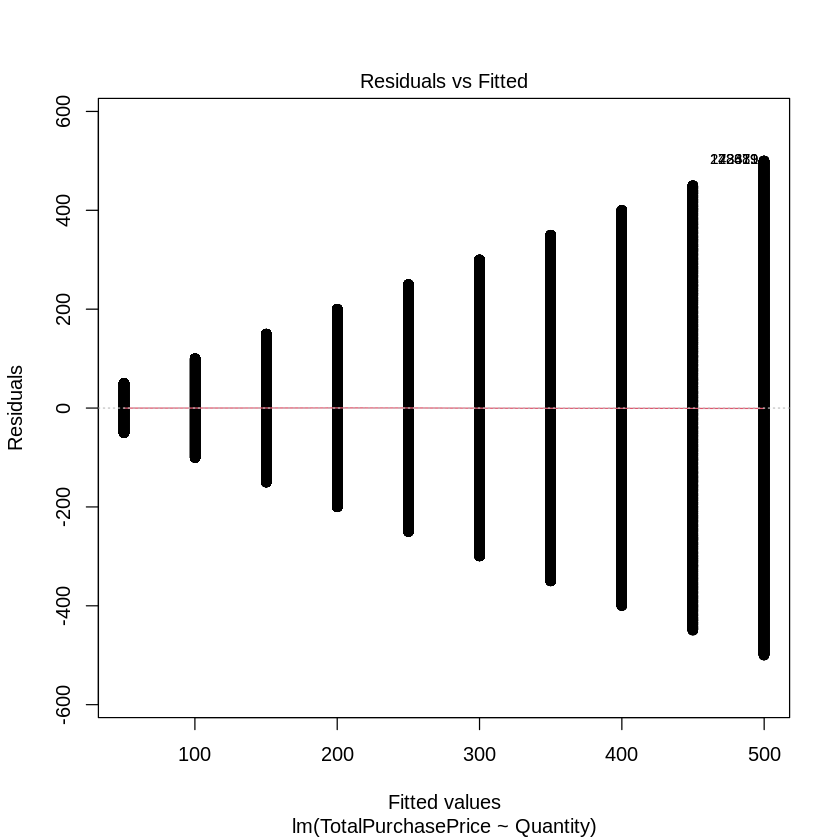

In [77]:
#Grafico de residuales vs valores predichos
plot(modelo_simple, which = 1)

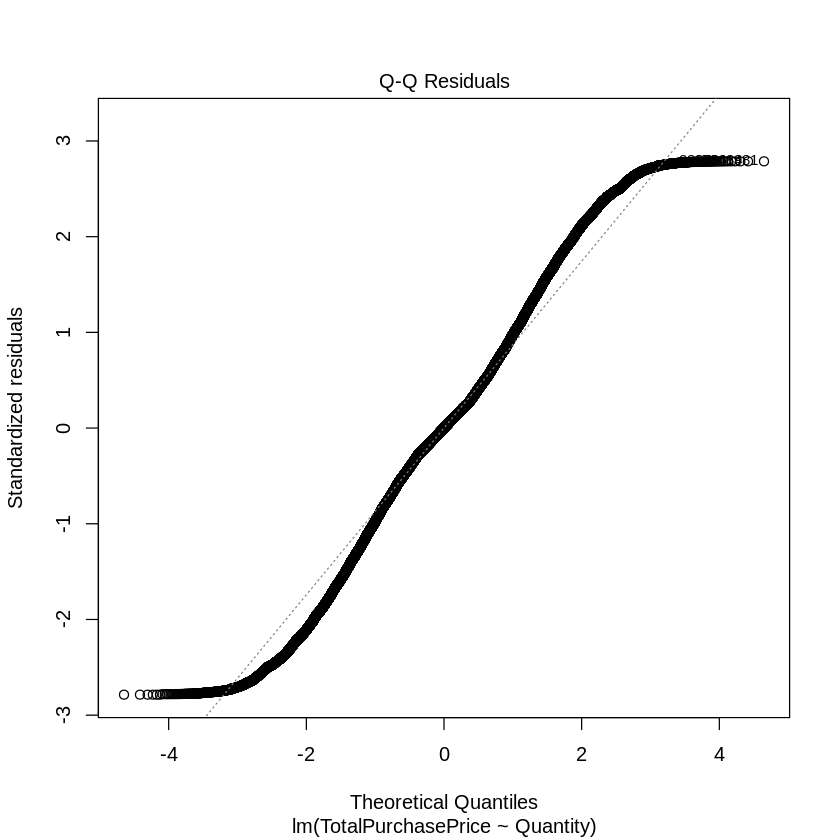

In [78]:
#Gráfico Q-Q
plot(modelo_simple, which = 2)

Regresión Lineal Múltiple: Quantity, UnitPrice, InvoiceDate, CustomerID, Country vs. TotalPurchasePrice

In [ ]:
# Ajustar un modelo de regresión lineal múltiple
modelo_multiple <- lm(TotalPurchasePrice ~ Quantity + UnitPrice + InvoiceDate + CustomerID + Country, data = data)

# Resumen del modelo
summary(modelo_multiple)

Esta regresión no se puede aplicar ya que no tenemos memoria RAM suficiente, ni en colab, ni en nuestro PC ni en la máquina virtual

Regresión Polinómica: InvoiceDate vs. TotalPurchasePrice

In [79]:
#Comprobamos y eliminamos las filas nulas o vacías
data <- data[!is.na(data$InvoiceDate) & data$InvoiceDate != "", ]

#Convertimos a formato fecha
data$InvoiceDate <- as.Date(data$InvoiceDate)

#Calculamos el número de días transcurridos
fecha_referencia <- min(data$InvoiceDate)
data$DiasTranscurridos <- as.numeric(data$InvoiceDate - fecha_referencia)

#Ajustamos el modelo
modelo_polinomico <- lm(TotalPurchasePrice ~ poly(DiasTranscurridos, 1), data = data)

#Resumen
summary(modelo_polinomico)


Call:
lm(formula = TotalPurchasePrice ~ poly(DiasTranscurridos, 1), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-275.76 -189.85  -65.07  138.85  725.28 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 275.0874     0.4195 655.734   <2e-16 ***
poly(DiasTranscurridos, 1) -251.5557   229.7756  -1.095    0.274    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 229.8 on 299998 degrees of freedom
Multiple R-squared:  3.995e-06,	Adjusted R-squared:  6.619e-07 
F-statistic: 1.199 on 1 and 299998 DF,  p-value: 0.2736


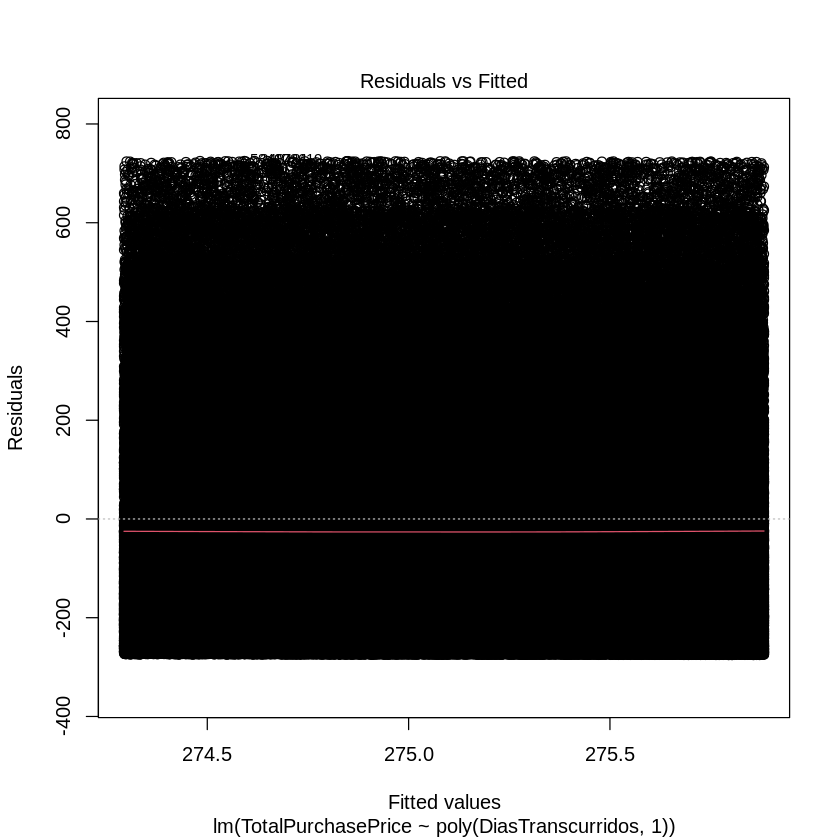

In [82]:
#Grafico de residuales vs valores predichos
plot(modelo_polinomico, which = 1)

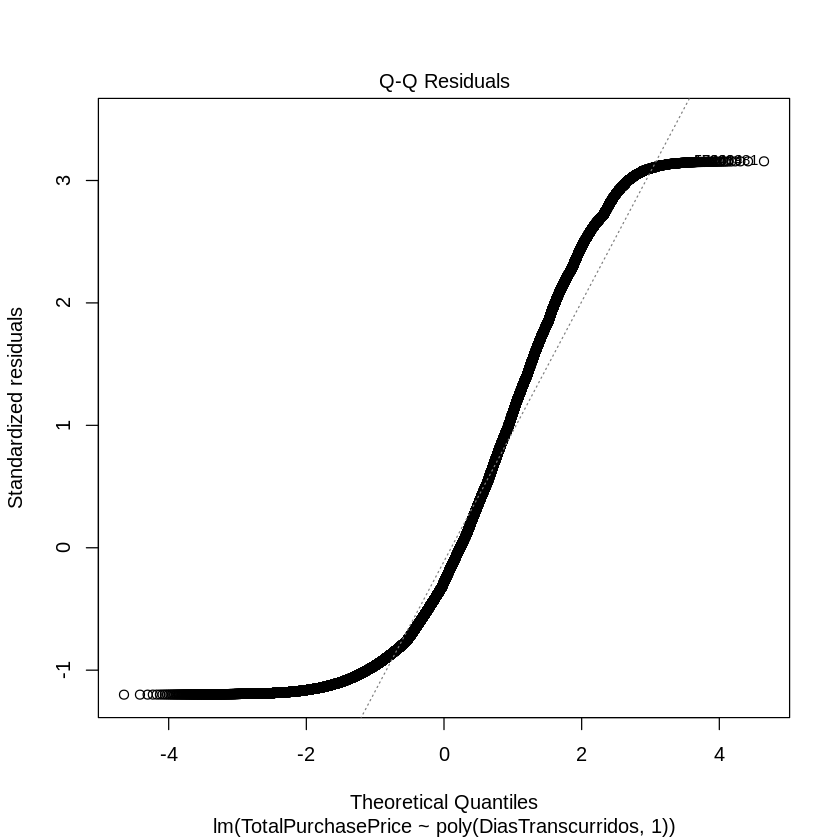

In [83]:
#Gráfico Q-Q
plot(modelo_polinomico, which = 2)

 Regresión Logística: Variable Binaria vs. Variables Independientes

In [84]:
#Creamos la variable CompraRealizada en función de TotalPurchasePrice
data$CompraRealizada <- ifelse(data$TotalPurchasePrice > 0, 1, 0)

In [85]:
#La convertimos a binario
data$CompraRealizada <- as.factor(data$CompraRealizada)

In [86]:
head(data)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchasePrice,DiasTranscurridos,CompraRealizada
,<int>,<int>,<chr>,<dbl>,<date>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<fct>
1,290889,89032,Fundamental zero tolerance algorithm,2,2021-11-19,8.48,99590,Guinea-Bissau,16.96,688,1
2,762220,61452,Profound bottom-line portal,10,2020-04-09,28.48,33955,Netherlands Antilles,284.80,99,1
3,395967,8170,Compatible value-added database,4,2022-03-30,68.73,45118,Japan,274.92,819,1
4,744580,18936,Future-proofed executive portal,3,2023-04-26,80.39,72728,Cape Verde,241.17,1211,1
5,500194,99083,Upgradable motivating access,10,2023-03-02,12.70,31985,Brazil,127.00,1156,1
6,166209,52136,Expanded static moderator,3,2021-06-05,44.85,97883,Christmas Island,134.55,521,1


In [87]:
#Aplicamos el modelo
modelo_logistico <- glm(CompraRealizada ~ Quantity + UnitPrice + CustomerID, data = data, family = "binomial")

#Resumen
summary(modelo_logistico)

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = CompraRealizada ~ Quantity + UnitPrice + CustomerID, 
    family = "binomial", data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.657e+01  2.126e+03  -0.012     0.99
Quantity    -1.677e-14  2.263e+02   0.000     1.00
UnitPrice   -1.970e-15  2.250e+01   0.000     1.00
CustomerID   2.340e-18  2.250e-02   0.000     1.00

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 299999  degrees of freedom
Residual deviance: 1.7405e-06  on 299996  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


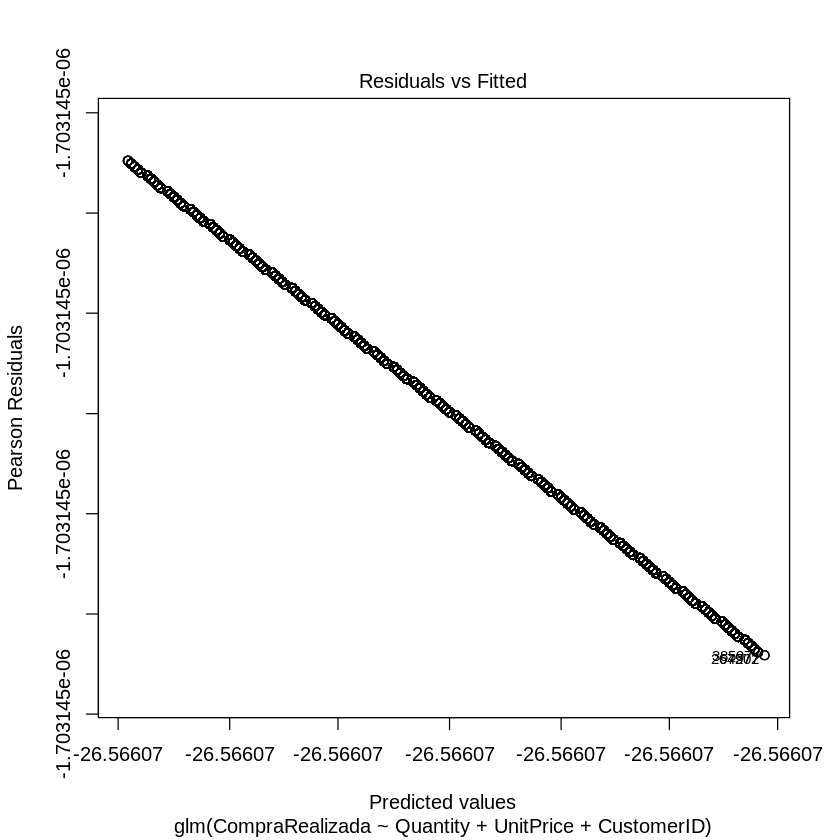

In [88]:
#Grafico de residuales vs valores predichos
plot(modelo_logistico, which = 1)

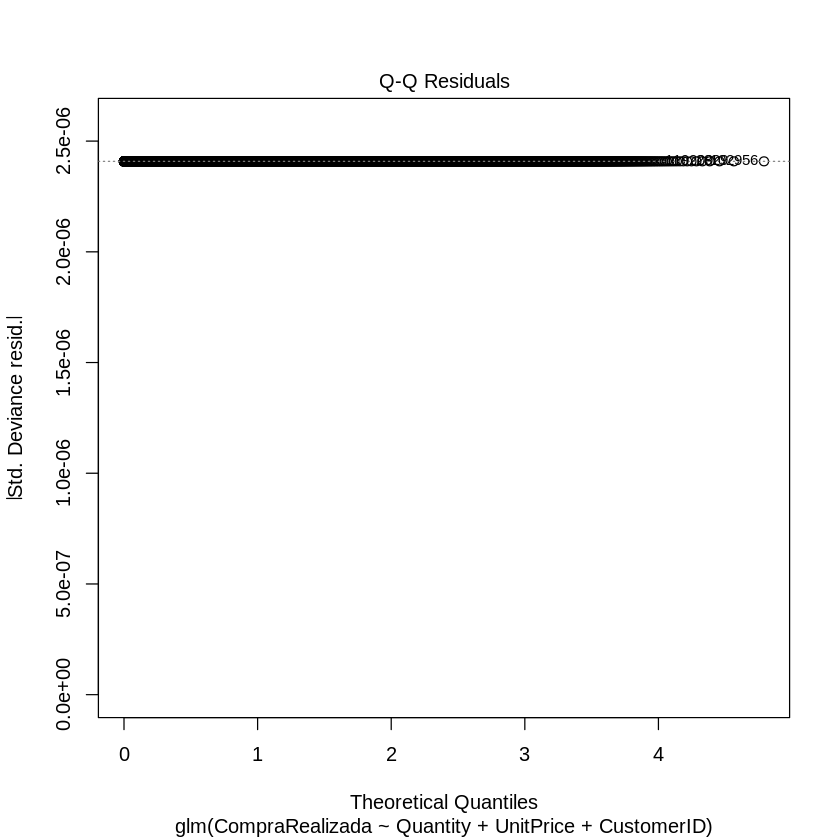

In [89]:
#Gráfico Q-Q
plot(modelo_logistico, which = 2)

Colinealidad

In [90]:
cor_matrix <- cor(data[, c("Quantity", "UnitPrice", "CustomerID")])
print(cor_matrix)

               Quantity     UnitPrice    CustomerID
Quantity    1.000000000 -0.0022610740 -0.0016794284
UnitPrice  -0.002261074  1.0000000000 -0.0005407659
CustomerID -0.001679428 -0.0005407659  1.0000000000


Ridge Regression

In [ ]:
install.packages("caret")

In [ ]:
install.packages("glmnet")

In [96]:
library(glmnet)

#Creamos la matriz de diseño X e Y como vector respuesta
X <- as.matrix(data[, c("Quantity", "UnitPrice", "CustomerID")])
Y <- data$TotalPurchasePrice

#Ajustamos el modelo
modelo_ridge <- glmnet(X, Y, alpha = 0, lambda = 0.1)

#Resumen
summary(modelo_ridge)

          Length Class     Mode   
a0        1      -none-    numeric
beta      3      dgCMatrix S4     
df        1      -none-    numeric
dim       2      -none-    numeric
lambda    1      -none-    numeric
dev.ratio 1      -none-    numeric
nulldev   1      -none-    numeric
npasses   1      -none-    numeric
jerr      1      -none-    numeric
offset    1      -none-    logical
call      5      -none-    call   
nobs      1      -none-    numeric

Métricas

In [99]:
library(caret)

#Dividimos los datos en 2 conjuntos, 70% y 30%, para el entrenamiento y la prueba
set.seed(123)  #Para reproducibilidad
split <- createDataPartition(data$CompraRealizada, p = 0.7, list = FALSE)
train_data <- data[split, ]
test_data <- data[-split, ]


In [100]:
library(caret)

#Lineal simple
predictions_lm <- predict(modelo_simple, newdata = test_data)
mse_lm <- mean((test_data$TotalPurchasePrice - predictions_lm)^2)
mae_lm <- mean(abs(test_data$TotalPurchasePrice - predictions_lm))
r2_lm <- 1 - (sum((test_data$TotalPurchasePrice - predictions_lm)^2) / sum((test_data$TotalPurchasePrice - mean(test_data$TotalPurchasePrice))^2))

#Mostramos el resultado
cat("MSE (Modelo Lineal Simple):", mse_lm, "\n")
cat("MAE (Modelo Lineal Simple):", mae_lm, "\n")
cat("R^2 (Modelo Lineal Simple):", r2_lm, "\n")

MSE (Modelo Lineal Simple): 32294.64 
MAE (Modelo Lineal Simple): 138.146 
R^2 (Modelo Lineal Simple): 0.3894362 
